<h1 style="text-align:">Губанов Матвей Рабочая тетрадь № 7 </h1>
<h1 style="text-align:">Нейронные сети</h1></p><p>
<b>Обучение персептрона</b></p><p>
Персептрон представляет собой элементарную часть нейронной сети.
Одиночный персептрон является линейным бинарным классификатором. В
этой лекции мы рассмотрим процедуру обучения персептрона для
классификации данных. Поскольку персептрон представляет собой
бинарный классификатор, то мы будем рассматривать лишь два класса.
</p>
<p>Пусть мы рассматриваем некоторое множество (конечное или
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)</p>
<p>Будем считать, что это множество разбивается на два класса, которые
мы будем обозначать +1 и -1. Поэтому возникает задача построения
функции, которая задана на нашем множестве векторов, и принимает
значения в множестве {+1, −1}. В качестве такой функции может выступать
персептрон. С алгебраической точки зрения персептрон состоит из вектора
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛).</p>
<p>При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛),
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.
</p>
<p>Приведем алгоритм обучения персептрона. Пусть у нас есть набор
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества {+1, −1} указывает к какому классу относится наш вектор.</p>
<ol>
    <li>Положим вектор весов 𝑤 равным нулю.</li>
    <li>Повторять 𝑁 раз следующие шаги:</li>
    <li>Для каждого тестового набора (𝑥, 𝑑):</li>
    <li>Вычислить 𝑦 = 𝑠𝑖𝑛𝑔[(𝑥, 𝑤)].</li>
    <li>Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 =𝑤𝑖 + 𝑎𝑑𝑥𝑖, 𝑖 = 1,2, . . . , 𝑛.</li>
</ol>
    <p>Описанный алгоритм довольно легко программировать.</p></div>

### 1.1.1 Пример

Задача:
Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным:

Решение

In [1]:
#класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self,N):
        #создать нулевые веса
        self.w=list()
        for i in range(N):
            self.w.append(0)
    #метод для вычисления значения персептрона
    def calc(self,x):
        res=0
        for i in range(len(self.w)):
            res=res+self.w[i]*x[i]
        return res
    #пороговая функция активации персептрона
    def sign(self,x):
        if(self.calc(x)>=0):
            return 1
        else:
            return -1
    #обучение на одном примере
    def learn(self,la,x,y):
        #обучаем только когда результат неверный
        if y*self.calc(x)<=0:
            for i in range(len(self.w)):
                self.w[i]=self.w[i]+la*y*x[i]
    #обучение по всем данным T - кортеж примеров
    def learning(self,la,T):
        #цикл обучения
        for n in range(100):
            #обучение по всему набору примеров
            for t in T:
                self.learn(la,t[0],t[1])

#создаём класс думерного персептрона
perceptron=Perceptron(2)
la=0.1#константа обучения
T=list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)#обучение персептрона
print(perceptron.w)#печатаем веса
#проверим работу на тестовых примерах
print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


<p style='text-indent:25px'>Видим, что что наш персептрон отлично научился распознавать образы,
относя к классу 1 те вектора, у которых первая компонента больше второй,
и к классу -1 в противном случае. Хотя устройство персептронов довольно
простое эти конструкции могут решать и практические задачи. Кроме того,
из таких персептронов состоят нейронные сети.</p>


<b> Реализация нейронной сети на Python
</b></p></div>
<p  style="text-indent: 20px">Нейронная сеть — это функциональная единица машинного или
глубокого обучения. Она имитирует поведение человеческого мозга,
поскольку основана на концепции биологических нейронных сетей.</p>
<p  style="text-indent: 20px">Наиболее распространенный тип нейронной сети, называемый
многослойным персептроном (MLP), представляет собой функцию, которая
отображает входные данные в выходные данные. MLP имеет один входной
слой и один выходной слой. Между ними может быть один или несколько
скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки.
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон
представляет собой линейную функцию, к которой применяется функция
активации для решения сложных задач. Выход каждого слоя подается в
качестве входных данных для всех нейронов следующих слоев.
</p>
<p  style="text-indent: 20px">Нейронные сети способны решать множество задач. В основном они
состоят из таких компонентов:
</p>
<p  style="text-indent: 50px">-входной слой (получение и передача данных);</p>
    <p  style="text-indent: 50px">-скрытый слой (вычисление);</p>
    <p  style="margin-left: 50px">-выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны.  Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдает один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это сила связи нейронов; чем вес больше, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:</p>
    <p  style="text-indent: 50px">-𝑥 → 𝑥 ∗ 𝑤1;</p>
    <p  style="text-indent: 50px">-𝑦 → 𝑦 ∗ 𝑤2.</p>
    <p  style="text-indent: 20px">Входы после взвешивания суммируются с прибавлением значения
порога «c»:</p>
    <p style="text-align:center">𝑥𝑤1 + 𝑦𝑤2 + c</p>
    <p  style="text-indent: 20px">Полученное значение пропускается через функцию активации
(сигмоиду), которая преобразует входы в один выход:
</p>
    <p style="text-align:center">𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).</p>
    <p  style="text-indent: 20px">Так выглядит сигмоида:</p>
    <img src="sigmoid.png"></img>
    <p>Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа стремятся к нулю, а положительные — к единице.</p>
    <p>Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.</p>
    <p>Входной слой: 𝑥 = 2, 𝑦 = 3.</p>
    <p style="text-align:center">((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 20 + 31 + 4 = 7.</p>
    <p style="text-align:center">𝑧 = 𝑓(7) = 0.99.</p>
</div>

### 1.1.2 Пример
Задача: </i></b>
         <p>Нейросеть состоит из множества соединенных между собой нейронов.
Пример несложной нейронной сети
</p>
<img src="neuro.png"></img>
        <p style="margin-left:30px">где:</p>
<p style="margin-left:30px">𝑥1, 𝑥2 — входной слой;</p>
<p style="margin-left:30px">ℎ1, ℎ2 — скрытый слой с двумя нейронами;</p>
            <p style="margin-left:30px">𝑜1 — выходной слой.</p>
        <p style="text-indent:30px">Например. Представим, что нейроны из графика выше имеют веса
[0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют
идентичную сигмоиду.</p>
        <p style="text-indent:30px">При входных данных 𝑥 = [2, 3] получим:</p>
        <p style="text-indent:20px">ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95.</p>
        <p style="text-indent:15px">𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72</p>
        <p style="text-indent:30px">Входные данные по нейронам передаются до тех пор, пока не
получатся выходные значения.</p>
   </div>
    </div>  
        <b><i style = "padding: 3px;"> Решение </i></b></div>

In [2]:
import numpy as np
def sigmoid(x):
    #Функция активации: f(x)=1/(1+e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias):
        self.weights=weights
        self.bias=bias
    def feedforward(self,inputs):
        total=np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
weights=np.array([0,1])#w1=0, w2=1
bias=4                 #c=4
n=Neuron(weights,bias)
x=np.array([2,3])#x=2,y=3
print(n.feedforward(x))

0.9990889488055994


In [3]:
import numpy as np
"""
    Данные нейросети:
    -два входа
    -два нейрона в скрытых слоях(h1,h2)
    -выход(o1)
    Нейроны имеют идентичные веса и пороги:
    -w=[0,1]
    -b=0
"""  
class OurNeuralNetwork:
    def __init__(self):
        weights=np.array([0,1])
        bias=0
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
        return out_o1
network=OurNeuralNetwork()
x=np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


<b> Обучение нейронной сети
</b></p></div>
<p  style="text-indent: 20px">Обучение нейросети — это подбор весов, которые соответствуют всем
входам для решения поставленных задач</p>
<p  style="text-indent: 20px">Класс нейронной сети:
</p>
    <code>class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)</code>
<p  style="text-indent: 20px">Каждый этап процесса обучения состоит из:
</p>
    <p  style="text-indent: 30px">-прямого распространения (прогнозируемый выход);</p>
    <p  style="margin-left: 30px">-обратного распространения (обновление весов и смещений).</p>
    <p  style="text-indent: 10px">Например, дана двуслойная нейросеть:</p>
    <p style="text-align:center">ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2).</p>
    <p  style="text-indent: 0px">В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏
(смещение). Настройку весов и смещений из данных входа или процесс
обучения нейросети можно изобразить так:
</p>
    <img src="dunno.png"></img>
    <p><b>Прямое распространение.</b></p>
<p>Как видно, формула прямого распространения представляет собой
несложное вычисление:
</p>
    <p style="text-align:center">ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2)</p>
    <p>Далее необходимо добавить в код функцию прямого распространения.
Предположим, что смещения в этом случае будут равны 0.</p>
    <code>class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.output=sigmoid(np.dot(self.layer1,self.weights2))</code>
    <p><b>Обратное распространение</b></p>
<p>Обратное распространение позволяет измерить производные в
обратном порядке — от конца к началу, и скорректировать веса и смещения.
Для этого необходимо узнать производную функции потери — тангенс угла
наклона.
</p>
    <p>Производная функции по отношению к весам и смещениям позволяет узнать градиентный спуск. Производная функции потери не содержит весов и смещений, для ее вычисления необходимо добавить правило цепи:</p>
    <p style="text-align:center">𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂) = ∑(𝑦 − 𝑦̂)2𝑛𝑖=1𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)𝜕𝑊=𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)𝜕𝑦̂∙𝜕𝑦̂𝜕𝑧 ∙𝜕𝑧𝜕𝑊 = 2(𝑦 − 𝑦̂) ∙ производную сигмоиды ∙ 𝑥 == 2(𝑦 − 𝑦̂) ∙ 𝑧(1 − 𝑧) ∙ 𝑥,
где 𝑧 = 𝑊𝑥 + b</p>
    <p style="text-indent:20px">Благодаря этому правилу можно регулировать веса. Добавляем в код
Python функцию обратного распространения:
</p>
    <code>class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.output=sigmoid(np.dot(self.layer1,self.weights2))
    def backprop(self):
        #применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2=np.dot(self.layer1.T,(2*(self.y-self.output)*sigmoid_derivative(self.output)))
        d_weights1=np.dot(self.input.T,(np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output),self.weights2.T)*sigmoid_derivative(self.layer1)))
        #обновление веса производной(наклона) функции потерь
        self.weights1+=d_weights1
        self.weights2+=d_weights2</code>
    <p style="text-indent:20px">Нейронные сети базируются на определенных алгоритмах и
математических функциях. Сначала может казаться, что разобраться в них
довольно сложно. Но существуют готовые библиотеки машинного обучения
для построения и тренировки нейросетей, позволяющие не углубляться в их
устройство.
</p>
</div>

<b>Задание </b> </p>
    </div>
        <b><i style = "padding: 3px;"> Задача: </i></b>
          Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
            <p>Данные нейросети:</p>
            <p  style="text-indent: 20px">-три входа (𝑥1, 𝑥2, 𝑥3);</p>
            <p  style="text-indent: 20px">-три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);</p>
            <p  style="text-indent: 20px">-выход (𝑜1).</p>
            <p>Нейроны имеют идентичные веса и пороги:</p>
            <p  style="text-indent: 20px">-𝑤 = [0.5, 0.5, 0.5]</p>
            <p  style="text-indent: 20px">-𝑏 = 0</p>
            <p>Данные нейросети:</p>
            <p  style="text-indent: 20px">-два входа (𝑥1, 𝑥2);</p>
            <p  style="text-indent: 20px">-два нейрона в скрытых слоях (ℎ1, ℎ2);</p>
            <p  style="text-indent: 20px">-два выхода (𝑜1, 𝑜2).</p>
            <p>Нейроны имеют идентичные веса и пороги:</p>
            <p  style="text-indent: 20px">-𝑤 = [1, 0];</p>
            <p  style="text-indent: 20px">-𝑏 = 1.</p>
        </div>
    </div>
</div>

In [4]:
class OurNeuralNetwork2:
    def __init__(self):
        weights=np.array([0.5,0.5,0.5])
        bias=0
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.h3=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_h3=self.h3.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2,out_h3]))
        return out_o1
network=OurNeuralNetwork2()
x=np.array([2,3,4])
print(network.feedforward(x))

0.8151036049051821


In [5]:
class OurNeuralNetwork3:
    def __init__(self):
        weights=np.array([1,0])
        bias=1
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
        self.o2=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
        out_o2=self.o2.feedforward(np.array([out_h2,out_h1]))
        return out_o1, out_o2
network=OurNeuralNetwork3()
x=np.array([2,3])
print(network.feedforward(x))

(0.8757270529783324, 0.8757270529783324)


<b>Задание </b> </p>
        <b><i style = "padding: 3px;"> Задача: </i></b>
          Реализуйте классы нейронных сетей с использованием других функций
активации.
            <p style="text-indent:20px"><b>Sigmoid</b></p>
            <p style="text-indent:20px"><b>tanh - tanh(x)</b></p>
            <p style="text-indent:20px"><b>ReLU - max(0,x)</b></p>
        </div>
    </div>
</div>

In [6]:
def tanh(x):
    return np.tanh(x)
def ReLU(x):
    return max(0,x)
class NeuronTan:
    def __init__(self,weights,bias):
        self.weights=weights
        self.bias=bias
    def feedforward(self,inputs):
        total=np.dot(self.weights,inputs)+self.bias
        return tanh(total)
class NeuronRel:
    def __init__(self,weights,bias):
        self.weights=weights
        self.bias=bias
    def feedforward(self,inputs):
        total=np.dot(self.weights,inputs)+self.bias
        return ReLU(total)
weights=np.array([0,1])#w1=0, w2=1
bias=4                 #c=4
n=NeuronTan(weights,bias)
x=np.array([2,3])#x=2,y=3
print(n.feedforward(x))

k=NeuronRel(weights,bias)
print(k.feedforward(x))

0.9999983369439447
7


<b>Введение в нейронные сети с помощью Scikit-Learn в Python</b></p></div>

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.
</p>
<p>Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:</p>
    <p style="text-indent:20px">-MLPClassifier;</p>
    <p style="text-indent:20px">-MLPRegressor</p>
    <p>Начнем с импорта необходимых библиотек.
</p>
    <code>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn</code>
    </div>
        <p style = "text-align: center;"><b>MLPClassifier</b></p></div>
        <p style="text-indent:20px">Загрузка данных</p>
        <p style="text-indent:20px">Мы будем загружать два набора данных.</p>
        <p style="text-indent:20px">Набор данных цифр: мы будем использовать набор данных цифр,
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем
использовать цифровые данные для задач классификации.</p>
        <p style="text-indent:20px">Набор данных о жилье в Бостоне: мы будем использовать набор
данных о жилье в Бостоне, который содержит информацию о различных
свойствах дома, таких как среднее количество комнат, уровень преступности
на душу населения в городе и т. д. Мы будем использовать его для задач
регрессии.
</p>
        <p style="text-indent:20px">Sklearn предоставляет оба этих набора данных. Мы можем загрузить
их, вызвав методы load_digits() и load_boston().</p>
        </div>   

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits, load_boston
digits=load_digits()
X_digits,Y_digits=digits.data,digits.target
print('Dataset Sizes: ',X_digits.shape,Y_digits.shape)

Dataset Sizes:  (1797, 64) (1797,)


In [8]:
boston=load_boston()
X_boston, Y_boston=boston.data,boston.target
print('Dataset Sizes: ',X_boston.shape,Y_boston.shape)

Dataset Sizes:  (506, 13) (506,)


<b>Классификация</b></p>
        <p style="text-indent:20px">MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.
</p>
        <p style="text-indent:20px">Как обычно разделим набор данных на две части:</p>
         <p style="text-indent:30px">-данные обучения, которые будут использоваться для модели обучения;</p>
    <p style="text-indent:30px">-тестовые данные, по которым будет проверяться точность обученной модели.</p>
        <p style="text-indent:20px">Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.
</p>
            </div>
        </div>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_boston
digits=load_digits()
X_digits,Y_digits=digits.data,digits.target
X_train, X_test, Y_train, Y_test=train_test_split(X_digits,Y_digits,train_size=0.80, test_size=0.20,stratify=Y_digits)
print('Train/Test Sizes: ',X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [10]:
from sklearn.neural_network import MLPClassifier
mlp_classifier=MLPClassifier()
mlp_classifier.fit(X_train,Y_train)
print(X_train)
Y_preds=mlp_classifier.predict(X_test)
print(Y_preds[:15])
print(Y_test[:15])
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test,Y_test))
print('Test Accuracy: %.3f'%mlp_classifier.score(X_train,Y_train))

[[ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  5. 16. ...  8.  6.  0.]
 ...
 [ 0.  0.  5. ...  1.  0.  0.]
 [ 0.  0. 10. ... 10.  0.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]]
[2 5 0 7 2 4 3 5 4 4 1 6 3 2 7]
[2 5 0 7 2 0 3 5 4 4 1 6 3 2 7]
Test Accuracy: 0.975
Test Accuracy: 1.000


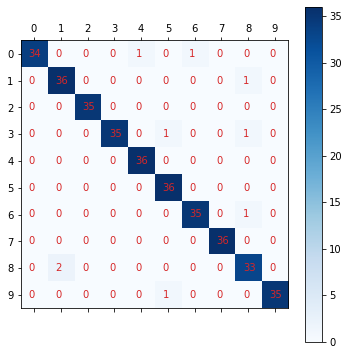

In [11]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(Y_test,Y_preds):
    conf_mat=confusion_matrix(Y_test,Y_preds)
    #print(conf_mat)
    fig=plt.figure(figsize=(6,6))
    plt.matshow(conf_mat,cmap=plt.cm.Blues,fignum=1)
    plt.yticks(range(10),range(10))
    plt.xticks(range(10),range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1,str(conf_mat[j,i]),color='tab:red')
plot_confusion_matrix(Y_test,mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier,
которые могут предоставить значимую информацию после обучения
модели.
</p>
         <p style="text-indent:30px">-loss_ — возвращает убыток после завершения процесса обучения.</p>
    <p style="margin-left:30px">-coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.</p>
    <p style="margin-left:30px">-intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.</p>
    <p style="text-indent:30px">-n_iter_ — количество итераций, для которых выполнялась оценка.</p>
        <p style="text-indent:20px">Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.
</p>
            </div>
        </div>

In [12]:
print("Loss: ", mlp_classifier.loss_)
print("Number of Coefs: ",len(mlp_classifier.coefs_))
print("Number of Intercepts: ",len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran: ",mlp_classifier.n_iter_)
print("name of Outuput Layer Activation Function: ",mlp_classifier.out_activation_)

Loss:  0.0031008975156624676
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  144
name of Outuput Layer Activation Function:  softmax


<b>MLPRegressor</b></p></div>
MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона. Также разделим набор данных на две части:
</p>
    <p style="text-indent:20px">-данные обучения (80%), которые будут использоваться для модели обучения;</p>
    <p style="text-indent:20px">-тестовые данные (20%), по которым будет проверяться точность обученной модели.</p>
    </div>
        </div>   

In [13]:
boston=load_boston()
X_boston, Y_boston=boston.data,boston.target
X_train, X_test, Y_train, Y_test=train_test_split(X_boston,Y_boston,train_size=0.80, test_size=0.20,random_state=123)
print('Train/Test Sizes: ',X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Train/Test Sizes:  (404, 13) (102, 13) (404,) (102,)


In [14]:
from sklearn.neural_network import MLPRegressor
mlp_regressor=MLPRegressor(random_state=123)
mlp_regressor.fit(X_train,Y_train)
Y_preds=mlp_regressor.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
##Метод Score оценивает точность моделей классификации
print('Test R^2 Score:%.3f'%mlp_regressor.score(X_test,Y_test))
print('Training R^2 Score:%.3f'%mlp_regressor.score(X_train,Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score:0.462
Training R^2 Score:0.510


In [15]:
print("Loss: ", mlp_regressor.loss_)
print("Number of Coefs: ",len(mlp_regressor.coefs_))
print("Number of Intercepts: ",len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran: ",mlp_regressor.n_iter_)
print("name of Outuput Layer Activation Function: ",mlp_regressor.out_activation_)

Loss:  28.538174061119626
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  130
name of Outuput Layer Activation Function:  identity


<b>Задание</b> </p>
Задача: </i></b>
          <p style="text-indent:20px">Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.</p>
            <p style="text-indent:20px">Для классификации можете взять набор данных Ирисов:
<a href="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f
    7d537619d0e07d5ae3/iris.csv">Ириски</a>
,а для регрессии датасет зависимости заработной платы от опыта работы:
<a href="https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv">Опыт<a/></p>
        </div>
    </div>
</div>

In [16]:
iris=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
x_train, x_test, y_train, y_test=train_test_split(
iris.iloc[:,:-1],
iris.iloc[:,-1],
test_size=0.20
)
print('Train/Test Sizes: ',x_train.shape,x_test.shape,y_train.shape,y_test.shape)
mlp_classifier=MLPClassifier()
mlp_classifier.fit(x_train,y_train)
y_preds=mlp_classifier.predict(x_test)
print(y_preds[:15])
print(y_test[:15])
print('Test Accuracy: %.3f'%mlp_classifier.score(x_test,y_test))
print('Test Accuracy: %.3f'%mlp_classifier.score(x_train,y_train))

Train/Test Sizes:  (120, 4) (30, 4) (120,) (30,)
['Virginica' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor']
149     Virginica
64     Versicolor
15         Setosa
88     Versicolor
101     Virginica
80     Versicolor
62     Versicolor
25         Setosa
117     Virginica
52     Versicolor
49         Setosa
54     Versicolor
85     Versicolor
78     Versicolor
51     Versicolor
Name: variety, dtype: object
Test Accuracy: 1.000
Test Accuracy: 0.967


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


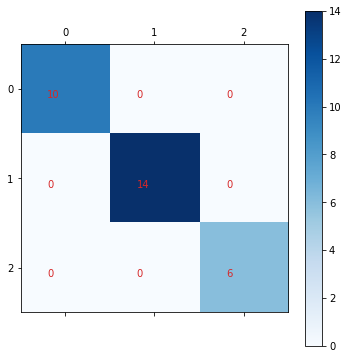

In [17]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_preds):
    conf_mat=confusion_matrix(y_test,y_preds)
    #print(conf_mat)
    fig=plt.figure(figsize=(6,6))
    plt.matshow(conf_mat,cmap=plt.cm.Blues,fignum=1)
    plt.yticks(range(3),range(3))
    plt.xticks(range(3),range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1,str(conf_mat[j,i]),color='tab:red')
plot_confusion_matrix(y_test,mlp_classifier.predict(x_test))

In [18]:
# продолжение
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [19]:
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print (X)
print (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes: (404, 13) (102, 13) (404,) (102,)


In [21]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [22]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# метод score оценивает точность моделей классификации
print('Test Accuracy Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training Accuracy Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test Accuracy Score : 0.462
Training Accuracy Score : 0.510


In [23]:
print('Loss:', mlp_regressor.loss_)
print('Number of Coefs:', len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]
print('Number of Iterations for Which Estimator Ran:', mlp_regressor.n_iter_)
print('Name of Output Layer Activation Function:', mlp_regressor.out_activation_)

Loss: 28.538174061119626
Number of Coefs: 2
Number of Iterations for Which Estimator Ran: 130
Name of Output Layer Activation Function: identity
